<a href="https://colab.research.google.com/github/debastiti/-PUCRIO-MVP-ML-Analytics/blob/main/MPV_MachineLearning_TiagoDebastiani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning

Nome: Tiago Matte Debastiani

Matrícula: 4052025000853

Dataset: [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data)

# Definição do Problema  

Como cientista de dados de uma imobiliária, recebi a tarefa de prever o preço das casas de um bairro no Estados Unidos chamado King County com base em características das mesmas. O objetivo principal é colocar em prática o aprendizado da sprint de Machine Learning, como preparação dos dados, modelagem e treinamento e avaliação dos resultados, os dados presentes no dataset são fictícios e provenientes da internet.

## Hipóteses do Problema

Tracei as seguintes hipóteses:


*   É possível prever o preço das casas de King County?
*   É possível entregar uma análise robusta para a corretora de imóveis?



## Tipo de tarefa & Área de aplicação

A condição é que o dataset fosse possível ser aplicado um algoritmo de machine learning (supervisionado ou não supervisionado) em um dos tipos de problema: classificação, regressão, clusterização ou previsão de séries temporais (forecasting).
Sendo o tipo da tarefa em questão, um problema de **regressão** e área de aplicação é uma área de **dados tabulares**.

## Valor para o negócio

Prevendo o preço das casas irá acelerar o processo de anunciar uma casa nova à venda e também irá padronizar com base nas características das casas faixas de preço para elas.

## Atributos do Dataset

| Nome da Coluna | Descrição | Valores de Exemplo |
|-------------|-------------|-------------|
| id | Identificador único | 7129300520 |
| date | Data | 20141013T000000 |
| price | Preço do imóvel | 221900 |
| bedrooms | Quantidade de quartos | 3 |
| bathrooms | Quantidade de banheiros | 2 |
| sqft_living | Área de casa construída | 1340 |
| sqft_lot | Área do lote | 7912 |
| Floors | Quantidade de andares | 2 |
| waterfront | Propriedade localizada diretamente na margem d'água | 0 |
| view | Classificação para o tipo de vista do imóvel | 0 |
| condition | Nota para a condição do imóvel | 3 |
| grade | Nota para a qualidade geral do  imógel | 10 |
| sqft_above | Área de casa superior (andares acima do térreo) construída | 2570 |
| sqft_basement | Área de casa inferior (porão) construída | 482 |
| yr_built | Ano de construção do imóvel | 2009 |
| yr_renovated | Ano em que o imóvel teve uma reforma significativa | 2020 |
| zipcode | Código postal do ímovel | 98178 |
| lat | Latitude do ímovel | 47.721 |
| long | Longitude do ímovel | -122.319 |
| sqft_living15 | Área de convivência da vizinhança | 1690 |
| sqft_lot15 | Tamanho médio do terreno da vizinhança | 101930 |

# Biliotecas & Funções

In [45]:
# === Setup básico e reprodutibilidade ===
import itertools
import os, random, time, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")
# Mostra todas as colunas
pd.set_option('display.max_columns', None)

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


In [46]:
url = "https://raw.githubusercontent.com/debastiti/-PUCRIO-MVP-ML-Analytics/refs/heads/main/kc_house_data.csv"

df_original = pd.read_csv(url)
df = df_original.copy()

# Entendimento e Qualidade dos Dados

Primeiramente irei checar a consistência do dataset, quantas intâncias e atributos possui, os formatos das colunas e se há nulos que necessita tratamento.

In [47]:
print(f"O dataset possui {len(df)} instâncias e {len(df.columns)} atributos")
print("---------------------------------")
print(f"Os atributos são: ")
for x in df.columns: print(x)
print("---------------------------------")
print("Os tipos de coluna são: ")
df.dtypes

O dataset possui 21613 instâncias e 21 atributos
---------------------------------
Os atributos são: 
id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
---------------------------------
Os tipos de coluna são: 


,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [48]:
print(f"O dataset possui {df.duplicated().sum()} linhas duplicadas")

O dataset possui 0 linhas duplicadas


In [49]:
for x in df.columns:
  print(f"Quantidade de nulos na coluna {x}: {sum(df[x].isna())}")

Quantidade de nulos na coluna id: 0
Quantidade de nulos na coluna date: 0
Quantidade de nulos na coluna price: 0
Quantidade de nulos na coluna bedrooms: 0
Quantidade de nulos na coluna bathrooms: 0
Quantidade de nulos na coluna sqft_living: 0
Quantidade de nulos na coluna sqft_lot: 0
Quantidade de nulos na coluna floors: 0
Quantidade de nulos na coluna waterfront: 0
Quantidade de nulos na coluna view: 0
Quantidade de nulos na coluna condition: 0
Quantidade de nulos na coluna grade: 0
Quantidade de nulos na coluna sqft_above: 0
Quantidade de nulos na coluna sqft_basement: 0
Quantidade de nulos na coluna yr_built: 0
Quantidade de nulos na coluna yr_renovated: 0
Quantidade de nulos na coluna zipcode: 0
Quantidade de nulos na coluna lat: 0
Quantidade de nulos na coluna long: 0
Quantidade de nulos na coluna sqft_living15: 0
Quantidade de nulos na coluna sqft_lot15: 0


Não necessitando tratamentos proveniente do conhecimento adquirido da sprint de análise de dados, posso seguir com o trabalho. Abaixo faço uma análise exploratória

# Análise Exploratória

In [50]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Analisando essas métricas para cada coluna numérica, pode-se ter uma ideia da escala dos dados, identificar possíveis outliers (valores muito distantes da média), entender a variabilidade e ter um panorama geral da distribuição de cada característica do dataset. Por exemplo, ao olhar o min e max de price, é possível ver a faixa de preço das casas no dataset, enquanto a média e a mediana podem indicar se a distribuição de preços é simétrica ou assimétrica.


In [51]:
# guardando uma lista com todas as features para plotar as distribuições
columns_l = df.columns.tolist()[2:]

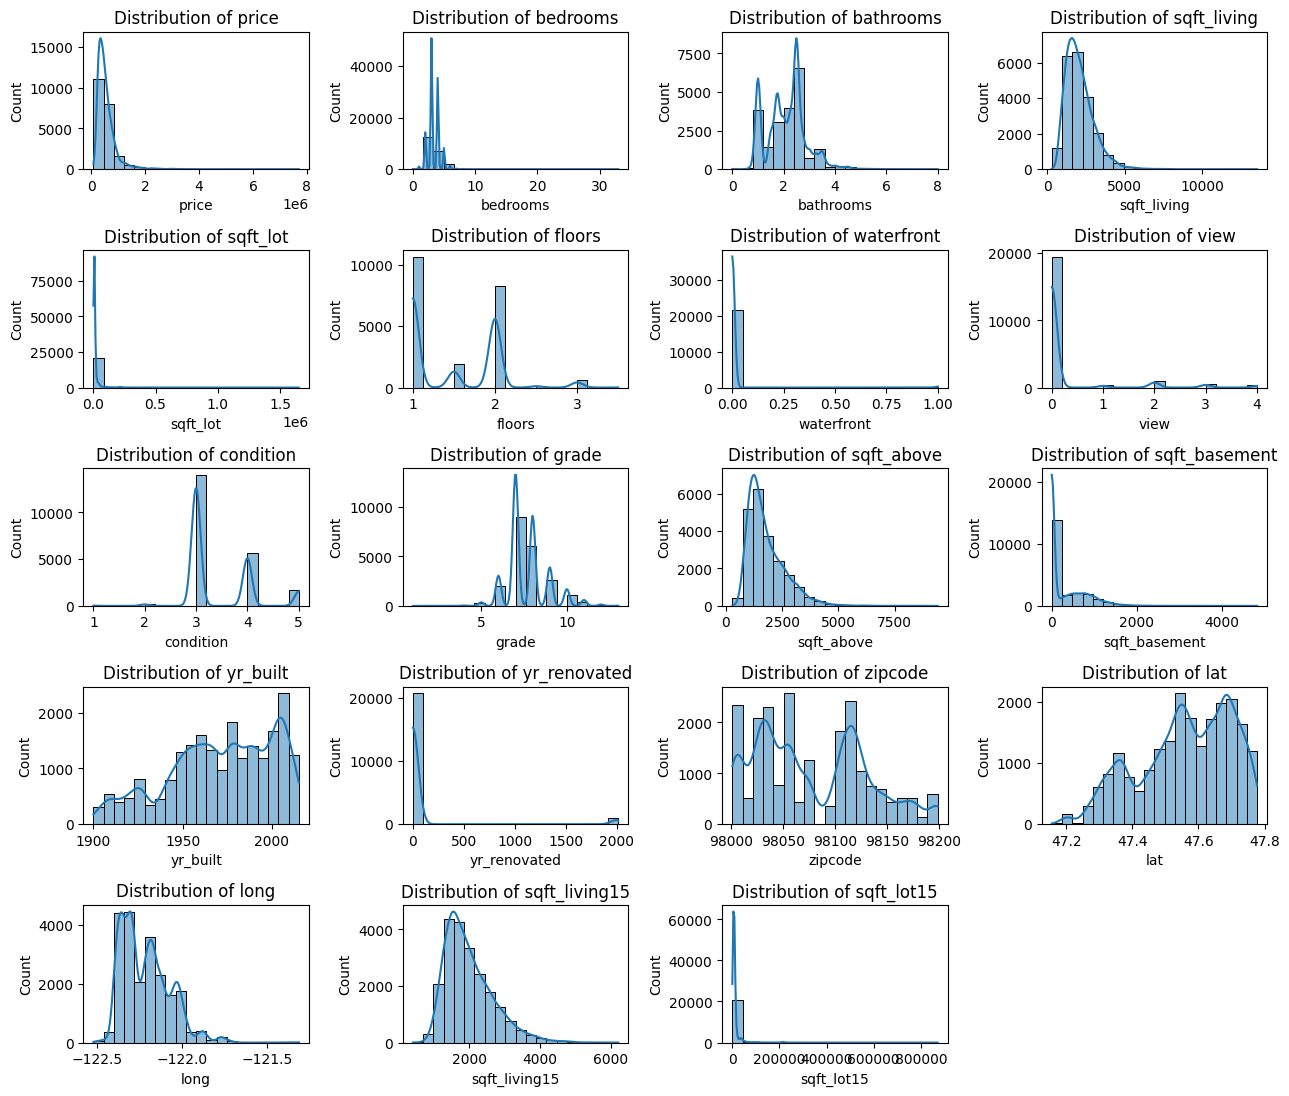

In [52]:
plt.figure(figsize=(13, 15))
n = 0
for x in columns_l:
    n += 1
    plt.subplot(7, 4, n)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.tight_layout()
plt.show()

Vendo as distribuições de todas as features, é possível ver a necessidade de padronizar os valores.

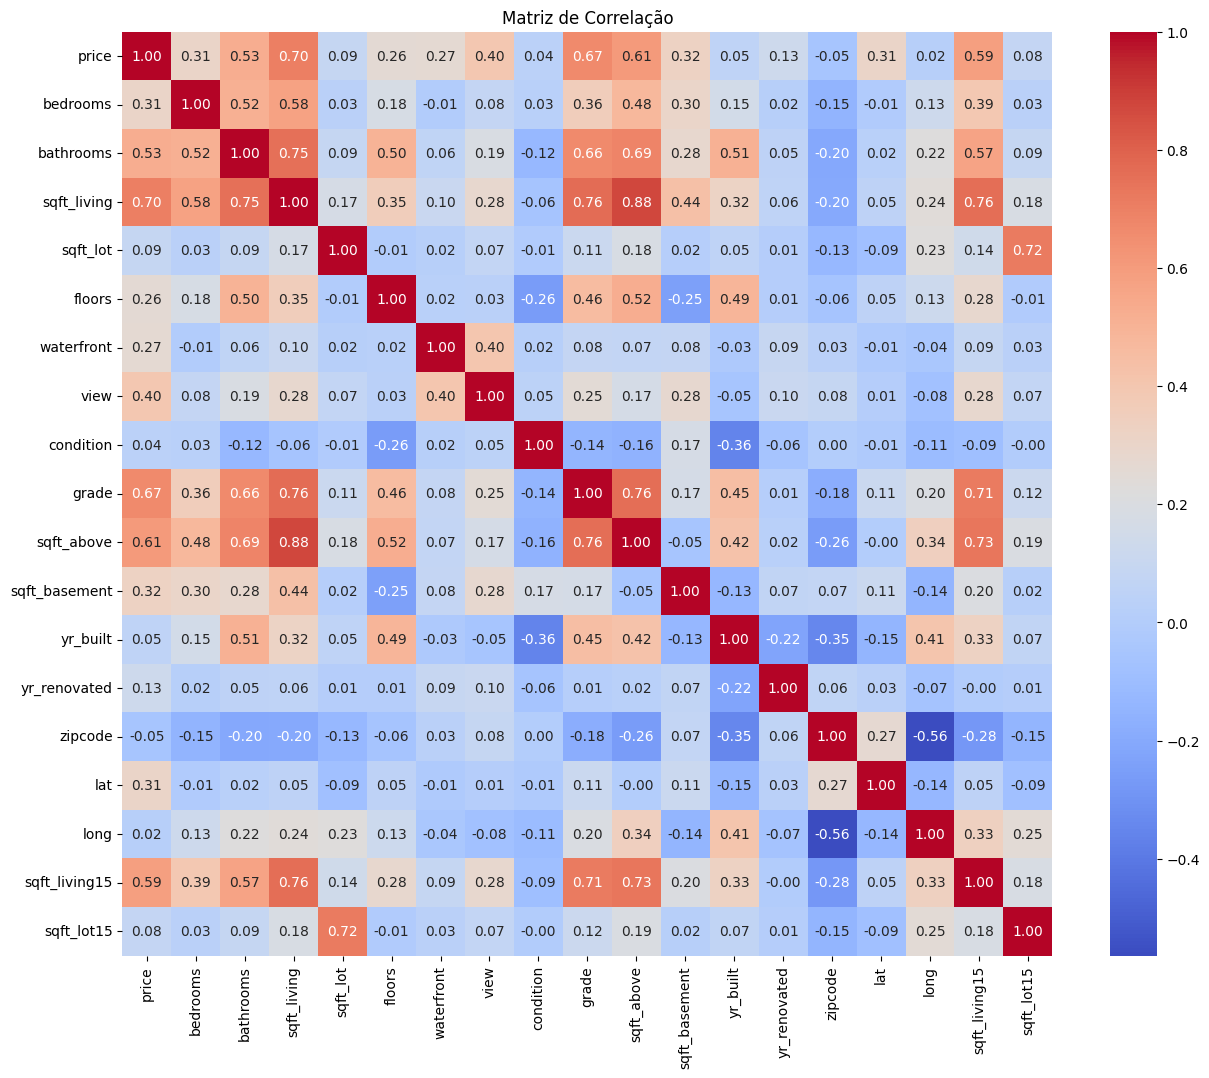

In [53]:
corr_matrix = df[columns_l].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix,
            annot=True,      # mostra os valores
            fmt=".2f",       # formato decimal
            cmap="coolwarm", # esquema de cores
            cbar=True)
plt.title("Matriz de Correlação")
plt.show()

Este Heat Map serve para verificar a correlação entre as features e remover as que possuem auto-correlação.

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

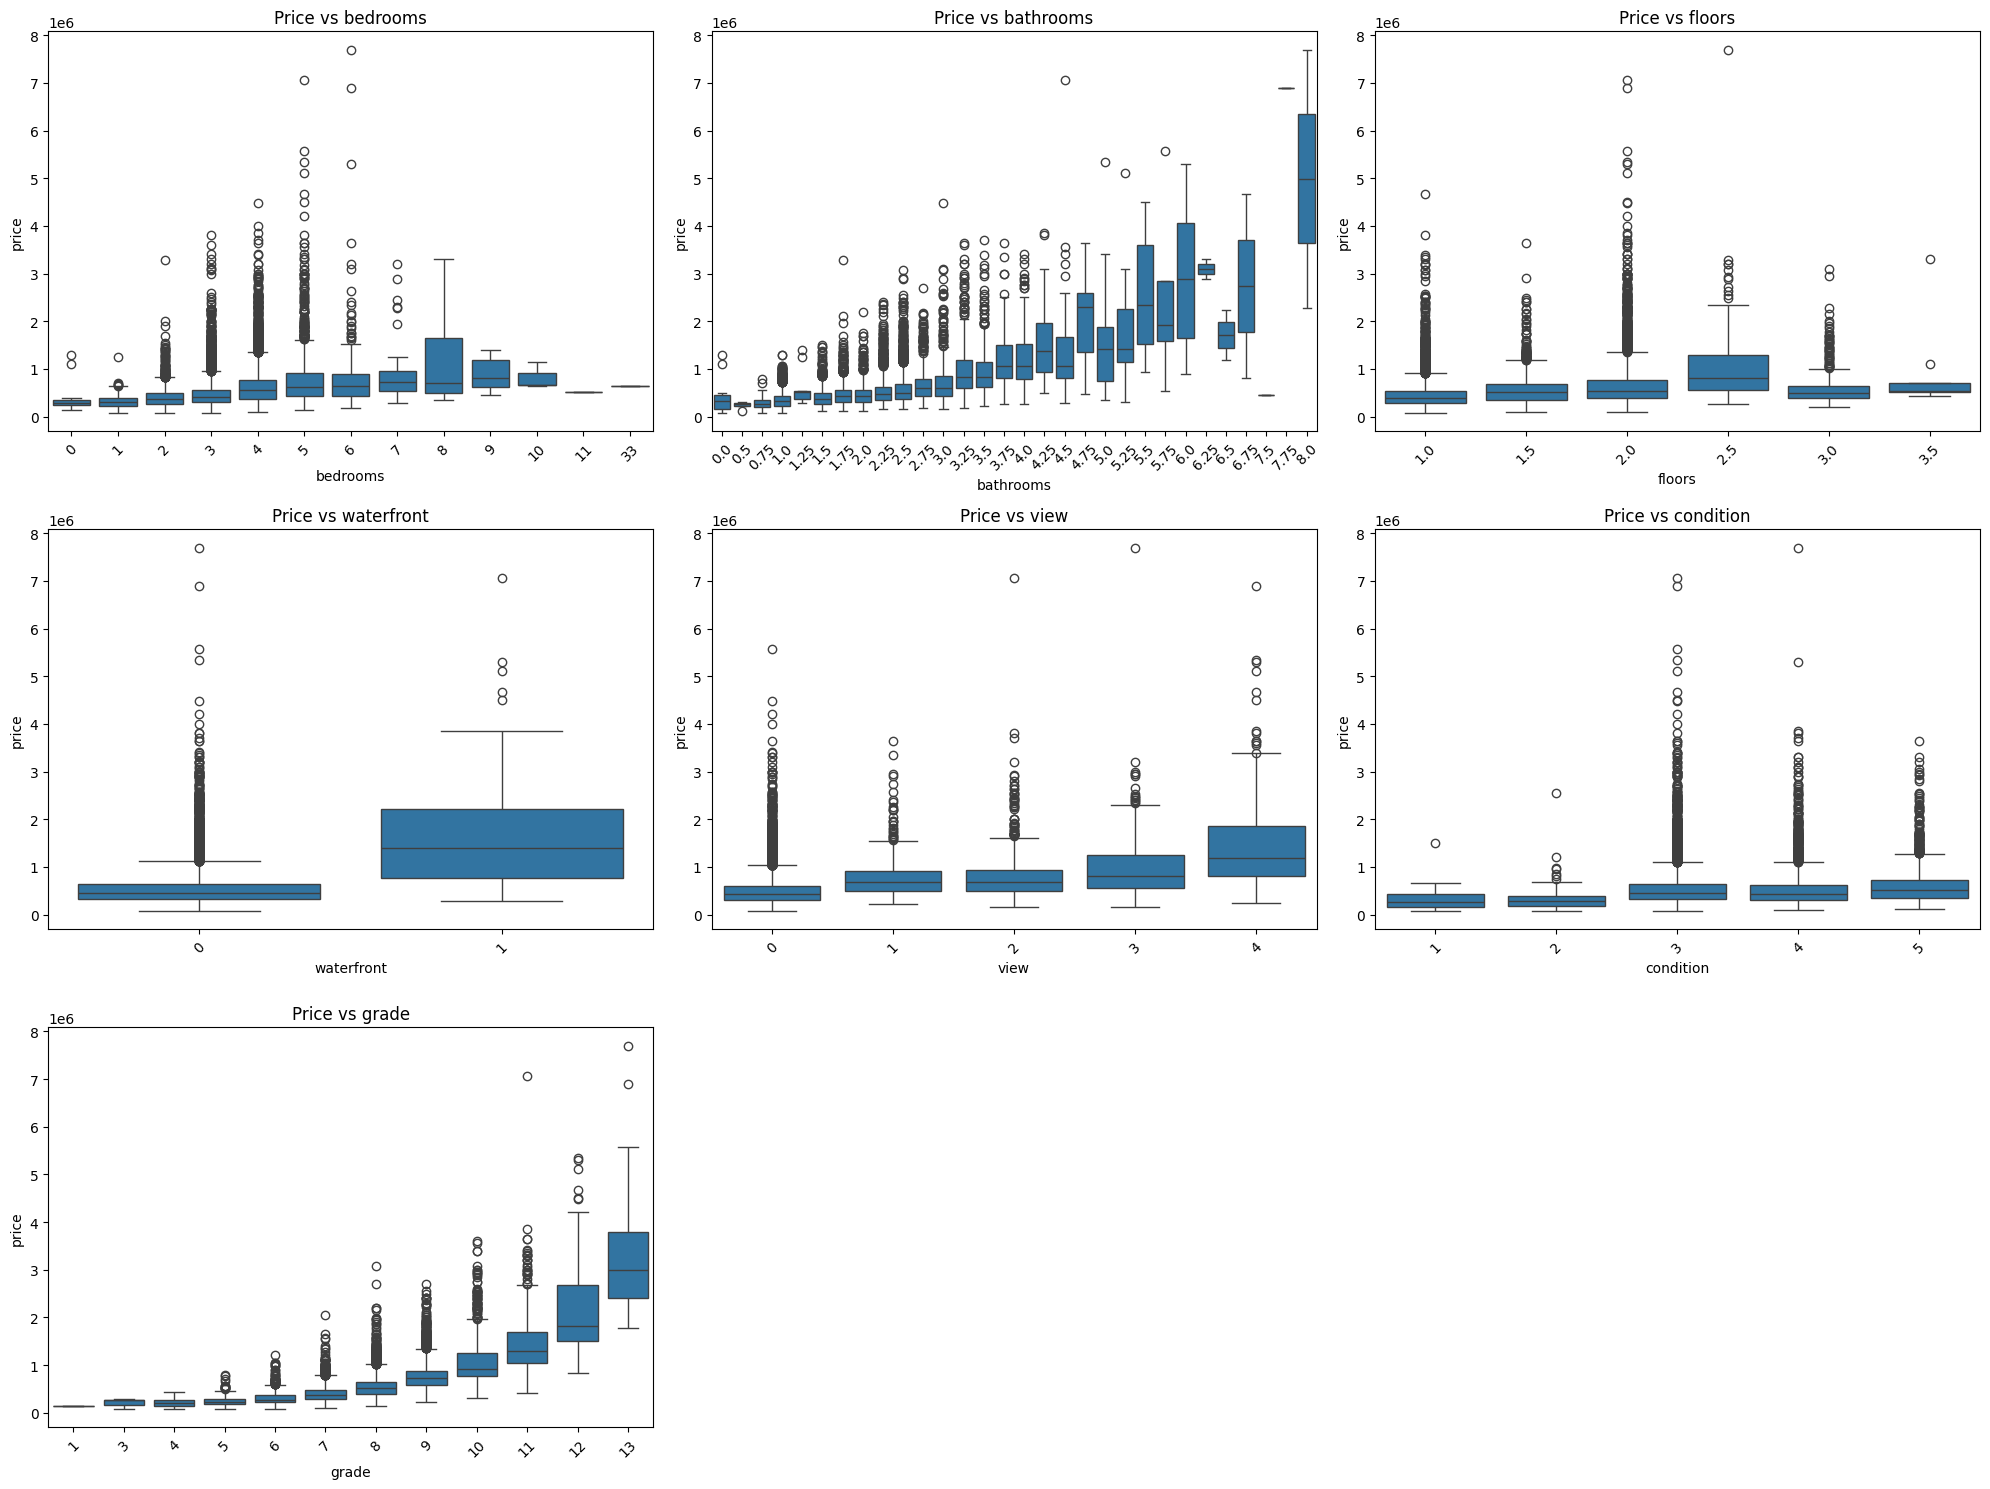

In [55]:
# Colunas que você quer comparar com price
columns_to_plot = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

plt.figure(figsize=(20, 15))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # ajusta linhas x colunas conforme necessário
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)  # rotaciona os rótulos se necessário

plt.tight_layout()
plt.show()


Boxplot feito para verificar a distribuição dos outliers das features relacionadas com o preço.

# Pré Processamento

In [56]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Baseado na análise exploratória onde tem a disperção dos valores em formato de tabela, será feito abaixo a remoção dos outliers.

In [57]:
# exemplo: detectar outliers na coluna price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['price'] < limite_inferior) | (df['price'] > limite_superior)]


In [58]:
# outliers sendo removidos
df_tratado = df[~df.index.isin(outliers.index)]

In [59]:
# converter para datetime
df_tratado['date'] = pd.to_datetime(df_tratado['date'], format='%Y%m%dT%H%M%S')

In [60]:
# criação de features de idade da casa e idade da reforma

# ano atual
current_year = pd.Timestamp.now().year

# criar coluna 'house_age'
df_tratado['house_age'] = current_year - df_tratado['yr_built']

#criar a coluna 'renovation_age'
df_tratado['renovation_age'] = np.where(df_tratado['yr_renovated'] == 0,
                                0,
                                current_year - df_tratado['yr_renovated']
                                )

# Escolhendo as melhores features
Será utilizado a regressão de Lasso para determinar as melhores features que serão escolhidas para a aplicação do modelo posteriormente

In [61]:
bf_df = df_tratado.copy()

num_cols = bf_df.select_dtypes(include=['int64', 'float64']).columns

# Cria scaler e ajusta apenas no treino
scaler = StandardScaler()
bf_df[num_cols] = scaler.fit_transform(bf_df[num_cols])

# extrair a variável alvo que são os preços das casas
Y = bf_df.price.values
# Remover 'price', 'id', 'date', 'yr_built', 'yr_renovated', 'zipcode' do dataframe e crie uma matriz
house = bf_df.drop(['price', 'id', 'date', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)
X = house.values
# Armazena os nomes das colunas/features em uma lista "colnames"
colnames = house.columns

In [62]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, Y)
# Pegando os coeficientes absolutos para rankear
importance = pd.DataFrame({
    'Feature': colnames,
    'Coefficient': np.abs(lasso.coef_)
}).sort_values(by='Coefficient', ascending=False)

print(importance)

           Feature  Coefficient
8            grade     0.362575
11             lat     0.358023
2      sqft_living     0.261113
15       house_age     0.250986
13   sqft_living15     0.145816
6             view     0.090053
1        bathrooms     0.084877
7        condition     0.083615
4           floors     0.081773
3         sqft_lot     0.042656
0         bedrooms     0.036244
5       waterfront     0.031579
14      sqft_lot15     0.014767
12            long     0.006604
9       sqft_above     0.002839
16  renovation_age     0.001529
10   sqft_basement     0.000000


In [63]:
# features mais importantes armazenadas em uma lista
features = importance[importance['Coefficient'] > 0]['Feature'].to_list()

In [64]:
# colunas a remover pois são as que possuem maior correlação com as outras features
remove_cols = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

# mantém só quem não está em remove_cols
features_semaltacorr = [col for col in features if col not in remove_cols]

In [65]:
features

['grade',
 'lat',
 'sqft_living',
 'house_age',
 'sqft_living15',
 'view',
 'bathrooms',
 'condition',
 'floors',
 'sqft_lot',
 'bedrooms',
 'waterfront',
 'sqft_lot15',
 'long',
 'sqft_above',
 'renovation_age']

In [66]:
features_semaltacorr

['grade',
 'lat',
 'house_age',
 'view',
 'bathrooms',
 'condition',
 'floors',
 'bedrooms',
 'waterfront',
 'long',
 'sqft_above',
 'renovation_age']

Acima é possível ver as listas que serão testadas nos modelos para avaliar se a alta correlação entre as features impacta nos resultados.

# Modelos
Serão criadas funções usando as boas práticas de programação e tornando elas reutilizáveis.

In [67]:
def criando_treino_teste(X, y):
  '''
  Função para criar os conjuntos de treino e teste
  '''
  # Identifica colunas numéricas
  num_cols = X.select_dtypes(include=['int64', 'float64']).columns

  # Divide treino/teste
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )

  # Cria scaler e ajusta apenas no treino
  scaler = StandardScaler()
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

  # Aplica mesma transformação no teste
  X_test[num_cols] = scaler.transform(X_test[num_cols])

  return X_train, y_train, X_test, y_test

def escolhendo_melhor_modelo(X_train, y_train, X_test, y_test):
  '''
  Função para escolher o melhor modelo
  '''
  # Criando os folds para a validação cruzada
  num_particoes = 10
  kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

  # Definindo uma seed global
  np.random.seed(7)

  # Listas para armazenar os modelos, resultados e nomes
  models = []
  results = []
  names = []

  # Preparando os modelos
  models.append(('LR', LinearRegression()))
  models.append(('Ridge', Ridge()))
  models.append(('Lasso', Lasso()))
  models.append(('KNN', KNeighborsRegressor()))
  models.append(('CART', DecisionTreeRegressor()))
  models.append(('RF', RandomForestRegressor(n_estimators=100, random_state=7)))

  # Avaliando cada modelo
  for name, model in models:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
      results.append(cv_results)
      names.append(name)
      msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
      print(msg)

  # Boxplot para comparar os modelos
  fig = plt.figure()
  fig.suptitle('Comparação do MSE dos Modelos')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=45)
  plt.show()




In [68]:
def treinando_modelo(X_train, y_train, X_test, y_test):
  '''
  Função para treinar o modelo
  '''
  # Modelo base
  rf = RandomForestRegressor(random_state=7)

  # Espaço de hiperparâmetros reduzido
  param_dist = {
      'n_estimators': [100, 200, 300],       # menos opções
      'max_depth': [None, 20, 40],           # profundidade mais relevante
      'min_samples_split': [2, 5],           # valores comuns
      'min_samples_leaf': [1, 2],            # folhas pequenas
      'max_features': ['auto', 'sqrt'],      # mais rápido
      'bootstrap': [True]                     # manter bootstrap
  }

  # RandomizedSearchCV com menos iterações
  random_search = RandomizedSearchCV(
      estimator=rf,
      param_distributions=param_dist,
      n_iter=10,            # apenas 10 combinações
      cv=5,
      scoring='neg_mean_squared_error',
      verbose=2,
      random_state=7,
      n_jobs=-1
  )

  # Treinar
  random_search.fit(X_train, y_train)

  # Melhor modelo
  best_rf = random_search.best_estimator_

  # Avaliar no teste
  y_pred = best_rf.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print("Melhores hiperparâmetros:", random_search.best_params_)
  print("MSE:", mse)
  print("RMSE:", rmse)

  return y_pred

## Teste com todas as features selecionadas

In [69]:
# Seleciona features e target
X = df_tratado[features]
X_semaltacorr = df_tratado[features_semaltacorr]
y = df_tratado['price']

In [70]:
X_train, y_train, X_test, y_test = criando_treino_teste(X, y)


LR: MSE 13366041676.54 (609508271.22) - RMSE 115611.60
Ridge: MSE 13366031056.13 (609473124.71) - RMSE 115611.55
Lasso: MSE 13366017258.76 (609499970.29) - RMSE 115611.49
KNN: MSE 9704182597.38 (634860383.48) - RMSE 98509.81
CART: MSE 12275297035.82 (690606428.95) - RMSE 110793.94
RF: MSE 6072524824.66 (480600317.32) - RMSE 77926.41


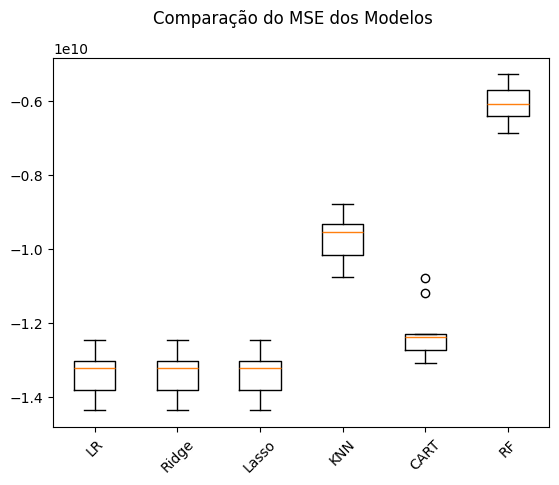

In [71]:
escolhendo_melhor_modelo(X_train, y_train, X_test, y_test)

Os testes foram feitos e foi possível verificar que o modelo Random Forest Regressor foi o melhor, sendo assim, utilizado para aplicar no modelo.

In [72]:
y_pred = treinando_modelo(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
MSE: 6165876878.333932
RMSE: 78523.09773776078


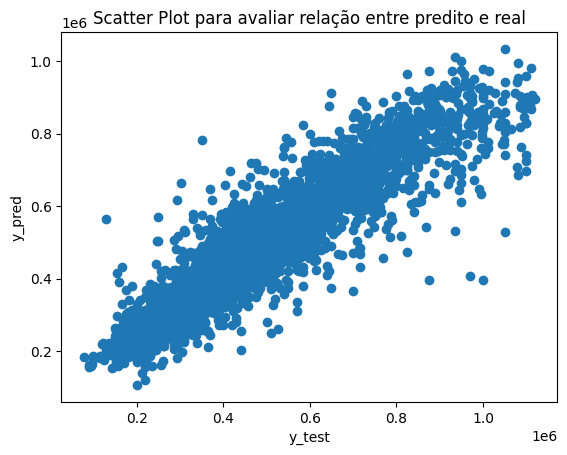

In [73]:
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot para avaliar relação entre predito e real')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Com o gráfico acima é possível verificar uma tendência linear, com isso, indica que visualmente a maioria dos resultados fazem sentido.

In [74]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

# Erro percentual médio (MAPE)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100

print(f"MAE: {mae:.2f}")
print(f"Erro Percentual Médio (MAPE): {mape:.2f}%")

MAE: 53961.15
Erro Percentual Médio (MAPE): 12.48%


O MAPE de 12,5% é considerado um resultado bom, tendo em vista que estamos trabalhando com uma ampla distribuição de preço dos imóveis.

## Treinando sem as features que possuem correlação entre si

In [75]:
X_train, y_train, X_test, y_test = criando_treino_teste(X_semaltacorr, y)

LR: MSE 14340532768.56 (564390969.52) - RMSE 119751.96
Ridge: MSE 14340528076.19 (564407609.44) - RMSE 119751.94
Lasso: MSE 14340532262.56 (564379734.10) - RMSE 119751.96
KNN: MSE 10323952397.50 (647718122.28) - RMSE 101606.85
CART: MSE 13274144569.42 (789961512.06) - RMSE 115213.47
RF: MSE 6776966974.52 (424897668.89) - RMSE 82322.34


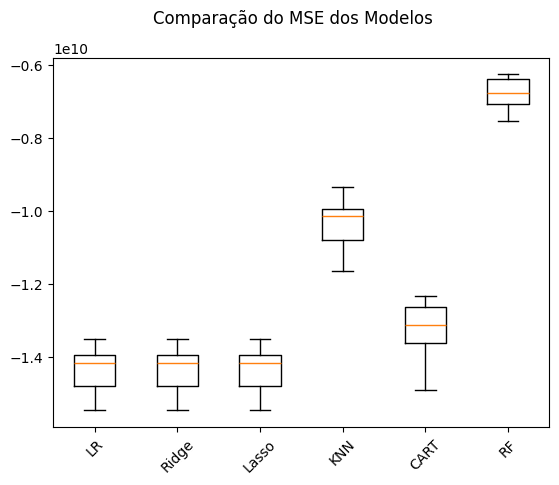

In [76]:
escolhendo_melhor_modelo(X_train, y_train, X_test, y_test)

In [77]:
y_pred = treinando_modelo(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
MSE: 6612494240.2190075
RMSE: 81317.24442096527


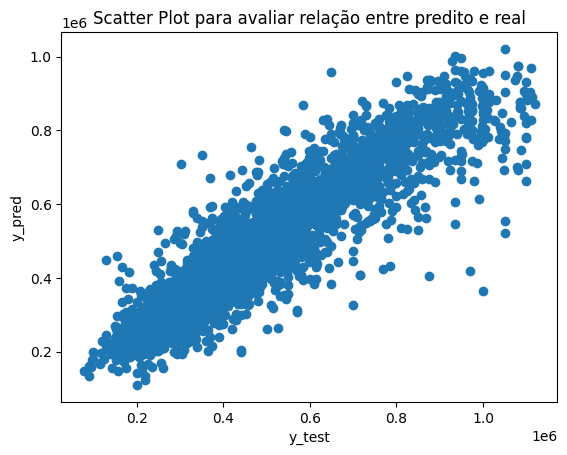

In [78]:
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot para avaliar relação entre predito e real')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [79]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

# Erro percentual médio (MAPE)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100

print(f"MAE: {mae:.2f}")
print(f"Erro Percentual Médio (MAPE): {mape:.2f}%")

MAE: 56482.59
Erro Percentual Médio (MAPE): 13.09%


Após remover as features que possuem correlação entre si, o MAPE aumentou de 13% para 15%, então, o pipeline escolhido seria o que possui todas as features.

# Conclusões e próximas etapas
O modelo escolhido foi o Random Forest Regressor, utilizando todas as features, entregando um MAPE de 12,5%.

Para os próximos passos com relação ao modelo, deve ser feito uma divisão de faixas de preço e desenvolver um modelo para cada faixa seguindo o mesmo pipeline de remoção de outliers, seleção de melhores features e seleção do melhor modelo.

Abaixo está uma análise para auxiliar a corretora de imóveis no direcionamento dos melhores imóveis para aumentar o faturamento, visando oferecer casas de maior preço.

In [83]:
resumo_vendas = df.groupby(by=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False).reset_index(drop=True)

In [84]:
resumo_vendas

,bedrooms,bathrooms,floors,waterfront,view,price
0,6,8.00,2.5,0,3,7700000.0
1,5,4.50,2.0,1,2,7062500.0
2,6,7.75,2.0,0,4,6885000.0
3,5,5.00,2.0,0,4,5350000.0
4,6,6.00,2.0,1,4,5300000.0
...,...,...,...,...,...,...
939,1,0.75,1.5,0,0,174000.0
940,1,2.00,1.0,0,0,171000.0
941,3,0.75,1.5,0,0,150000.0
942,4,0.75,1.0,0,0,142500.0


Acima está uma tabela que será disponibilizado aos corretores de imóveis com o objetivo de orientar eles quais casas mostrar primeiro aos clientes, sendo as casas com o preço mais alto para aumentar o faturamento da imobiliária.

Para eles saber se a casa é uma casa de preço médio alto, foi escolhida somente features que são fáceis de identificar por um corretor ao adentrar o imóvel, como quantidade de quartos, banheiros, andares, vista e se a casa é na beira de lago/rio/praia.